**Problem Statement**
=====================

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short-term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

**Background**
------------

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

**Objective**
----------

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**Task**
-----

The company wants to know:

* **Which variables are significant in predicting the demand for shared bikes.**
* **How well those variables describe the bike demands**

**Dataset**
----------

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

**Business Goal**
----------------

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Data Cleaning and Manipulation

### Imports and Initial Setup

In [253]:
# Importing core libraries required for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt
from tabulate import tabulate
from IPython.display import display, HTML
import warnings
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_rows', None)     # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.max_colwidth', 25) 

# Suppress warnings
warnings.filterwarnings('ignore')

### Loading Data

In [254]:
df=pd.read_csv("day.csv")
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [255]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [256]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [257]:
df.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [258]:
df.shape

(730, 16)

**Checking Percentage of Missing Values**
1. **Ensures data quality and integrity**: Verifies that data is accurate and reliable.
2. **Identifies potential biases**: Reveals missing values that could skew analysis and modeling results.
3. **Determines need for data imputation or interpolation**: Indicates whether missing values need to be filled or estimated.
4. **Avoids reduced performance**: Prevents missing values can impact negatively .
5. **Reduces risk of overfitting or underfitting**: Ensures that models are trained on complete and representative data.
6. **Informs data preprocessing and feature engineering decisions**: Guides choices about handling missing values and data preparation.
7. **Helps meet data quality thresholds**: Ensures that missing values are within acceptable limits (e.g., <5%, 5-10%, >10%).

In [259]:
percentage_missing = (df.isnull().sum() / len(df)) * 100
percentage_missing_sorted = percentage_missing.sort_values(ascending=False)
percentage_missing_sorted

instant       0.0
dteday        0.0
season        0.0
year          0.0
month         0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [251]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


### Dropping Columns

### Dropping Columns


The **instant** column, being a unique identifier, doesn't provide any meaningful information for the analysis.

The **dteday** column, as you mentioned, is redundant due to the presence of other time-related columns like **yr**, **mnth**, and **weekday**.

By removing these columns, the dataset will be more streamlined and focused on the relevant variables for analysis.


In [260]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [261]:
df.drop(['instant', 'dteday'],  axis=1,inplace=True)

In [262]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt


In [263]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [264]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [265]:
df.dtypes

season          int64
year            int64
month           int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [267]:
df.holiday.unique()

array([0, 1])

## Outlier treatment

In [270]:
def get_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    return {'lower_bound': q1 - 1.5 * iqr, 'upper_bound': q3 + 1.5 * iqr}

def visualize_outliers(df, column):
    print('column',column)
    fig, p = plot.subplots(1, 2, figsize=(8, 4))
    sea.boxplot(df[column], ax=p[0], orient="h")
    p[0].set_title('Plot [' + column + '] - Original')
    new_df = df[(df[column] > get_iqr(df, column)['lower_bound']) & (df[column] < get_iqr(df, column)['upper_bound'])]
    sea.boxplot(new_df[column], ax=p[1], orient="h")
    p[1].set_title('Plot [' + column + '] - Post Outlier Treatment')
    plot.tight_layout()
    plot.show()

def remove_outliers(df, column):
    old_rows = len(df)
    iqr_bounds = get_iqr(df, column)
    new_df = df[(df[column] > iqr_bounds['lower_bound']) & (df[column] < iqr_bounds['upper_bound'])]
    new_rows = len(new_df)
    print('Rows dropped: ', old_rows - new_rows)
    print('Percentage rows dropped: ', round((old_rows - new_rows) / old_rows * 100, 2), "%")
    return new_df

original_row_count 730
['holiday']
column holiday


KeyError: 0

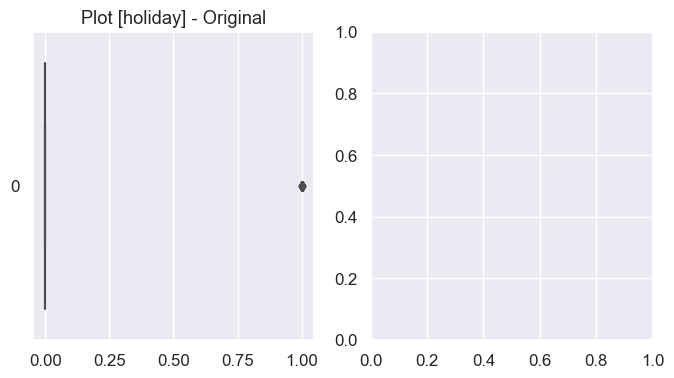

In [273]:
original_row_count = len(df)
print('original_row_count',original_row_count)

outlier_treatment = ['holiday']
print(outlier_treatment)
for column in outlier_treatment:
    visualize_outliers(df, column)
    df = remove_outliers(df, column)
len(df)

original_row_count 730
Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')
column season


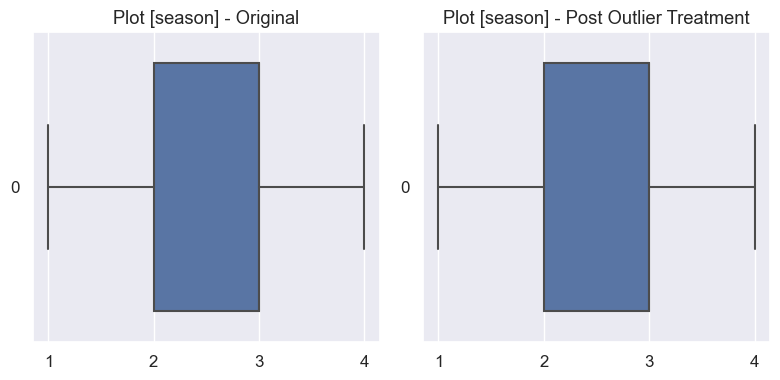

Rows dropped:  0
Percentage rows dropped:  0.0 %
column year


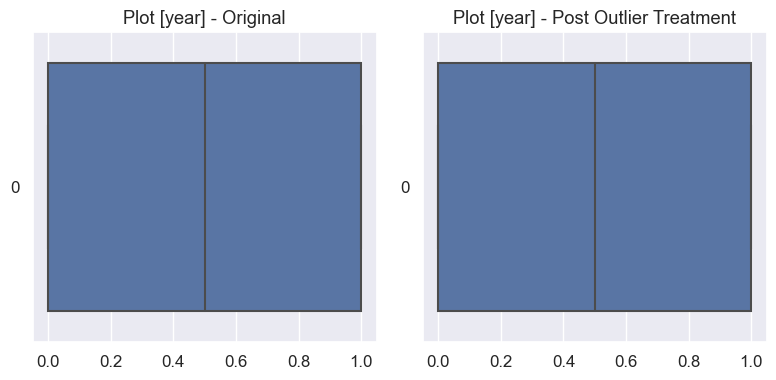

Rows dropped:  0
Percentage rows dropped:  0.0 %
column month


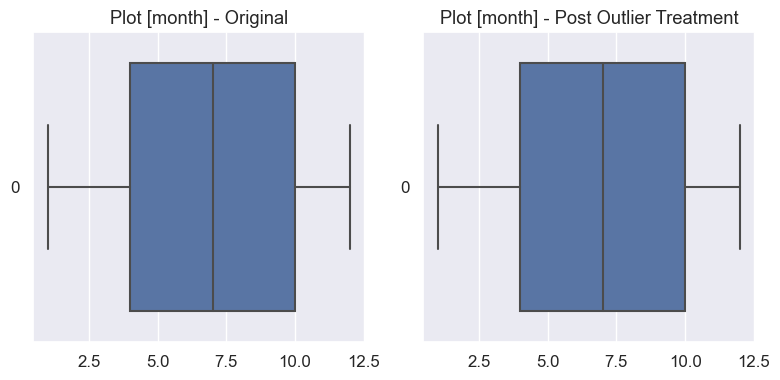

Rows dropped:  0
Percentage rows dropped:  0.0 %
column holiday


KeyError: 0

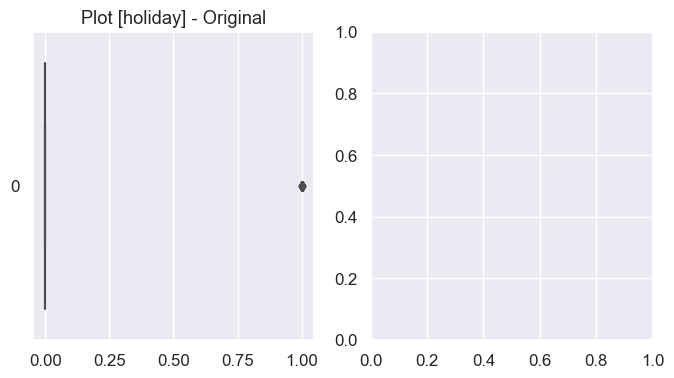

In [274]:
original_row_count = len(df)
print('original_row_count',original_row_count)

outlier_treatment = df.columns
print(outlier_treatment)
for column in outlier_treatment:
    visualize_outliers(df, column)
    df = remove_outliers(df, column)
len(df)

### Features Engineering

In [133]:
df.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [134]:
unique_values = df.season.unique()
unique_values

array([1, 2, 3, 4])

# Encoding/mapping the season column

In [ ]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [214]:
unique_values = df.mnth.unique()
unique_values




array(['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object)

# Encoding/mapping the month column

In [211]:
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

# Encoding/mapping the weekday column

In [216]:
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [217]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     0 non-null      object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 80.0+ KB


In [141]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Univeriate Analysis

In [142]:
column_titles={
"season": "Season of the year",
"yr": "Year of observation",
"mnth": "Month of observation",
"weekday": "Weekday indicator",
"workingday": "Working day indicator",
"weathersit": "Weather situation",
"temp": "Temperature",
"atemp": "Apparent temperature",
"hum": "Relative humidity",
"windspeed": "Wind speed",
"casual": "Casual bike users",
"registered": "Registered bike users",
"cnt": "Total bike users"
}

In [143]:
def univariate_analysis(df, columns):
    num_columns = len(columns)
    fig, p = plot.subplots(num_columns, 2, figsize=(16, 4*num_columns))
    for i, column in enumerate(columns):
        sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[i, 0])
        sea.boxplot(x=column, data=df, ax=p[i, 1])
        p[i, 0].set_xlabel(column_titles[column])
        p[i, 1].set_xlabel(column_titles[column])
        p[i, 0].set_yticks([])
        p[i, 1].set_yticks([])
        p[i, 1].set_xticklabels(p[i, 1].get_xticklabels())
        mode_value = df[column].mode().values[0]
        p[i, 1].axvline(x=mode_value, color='red', linestyle='--', label='Mode')
        min_value = df[column].min()
        max_value = df[column].max()
        # Find the range where most of the values are present
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        p[i, 0].annotate(f'Most values between {q1} and {q3}', xy=(0, 1.1), xycoords='axes fraction', ha='left', va='bottom')
        p[i, 0].annotate(f'Range: {min_value} - {max_value}', xy=(0, 1.0), xycoords='axes fraction', ha='left', va='bottom')
        p[i, 0].annotate(f' ', xy=(0, 0.9), xycoords='axes fraction', ha='left', va='bottom')  # Add a newline
        p[i, 0].annotate(f'{i+1}.Univariate analysis of {column_titles[column]}', xy=(0.5, 1.2), xycoords='axes fraction', ha='center', va='bottom', fontsize=12, fontweight='bold')
        new_row = pd.DataFrame({'Feature': [column_titles[column]], 'Most values between': [f'{q1} - {q3}'], 'Range': [f'{min_value} - {max_value}']})
        
    plot.tight_layout()
    plot.show()
    

## Quantitative Variable Analysis

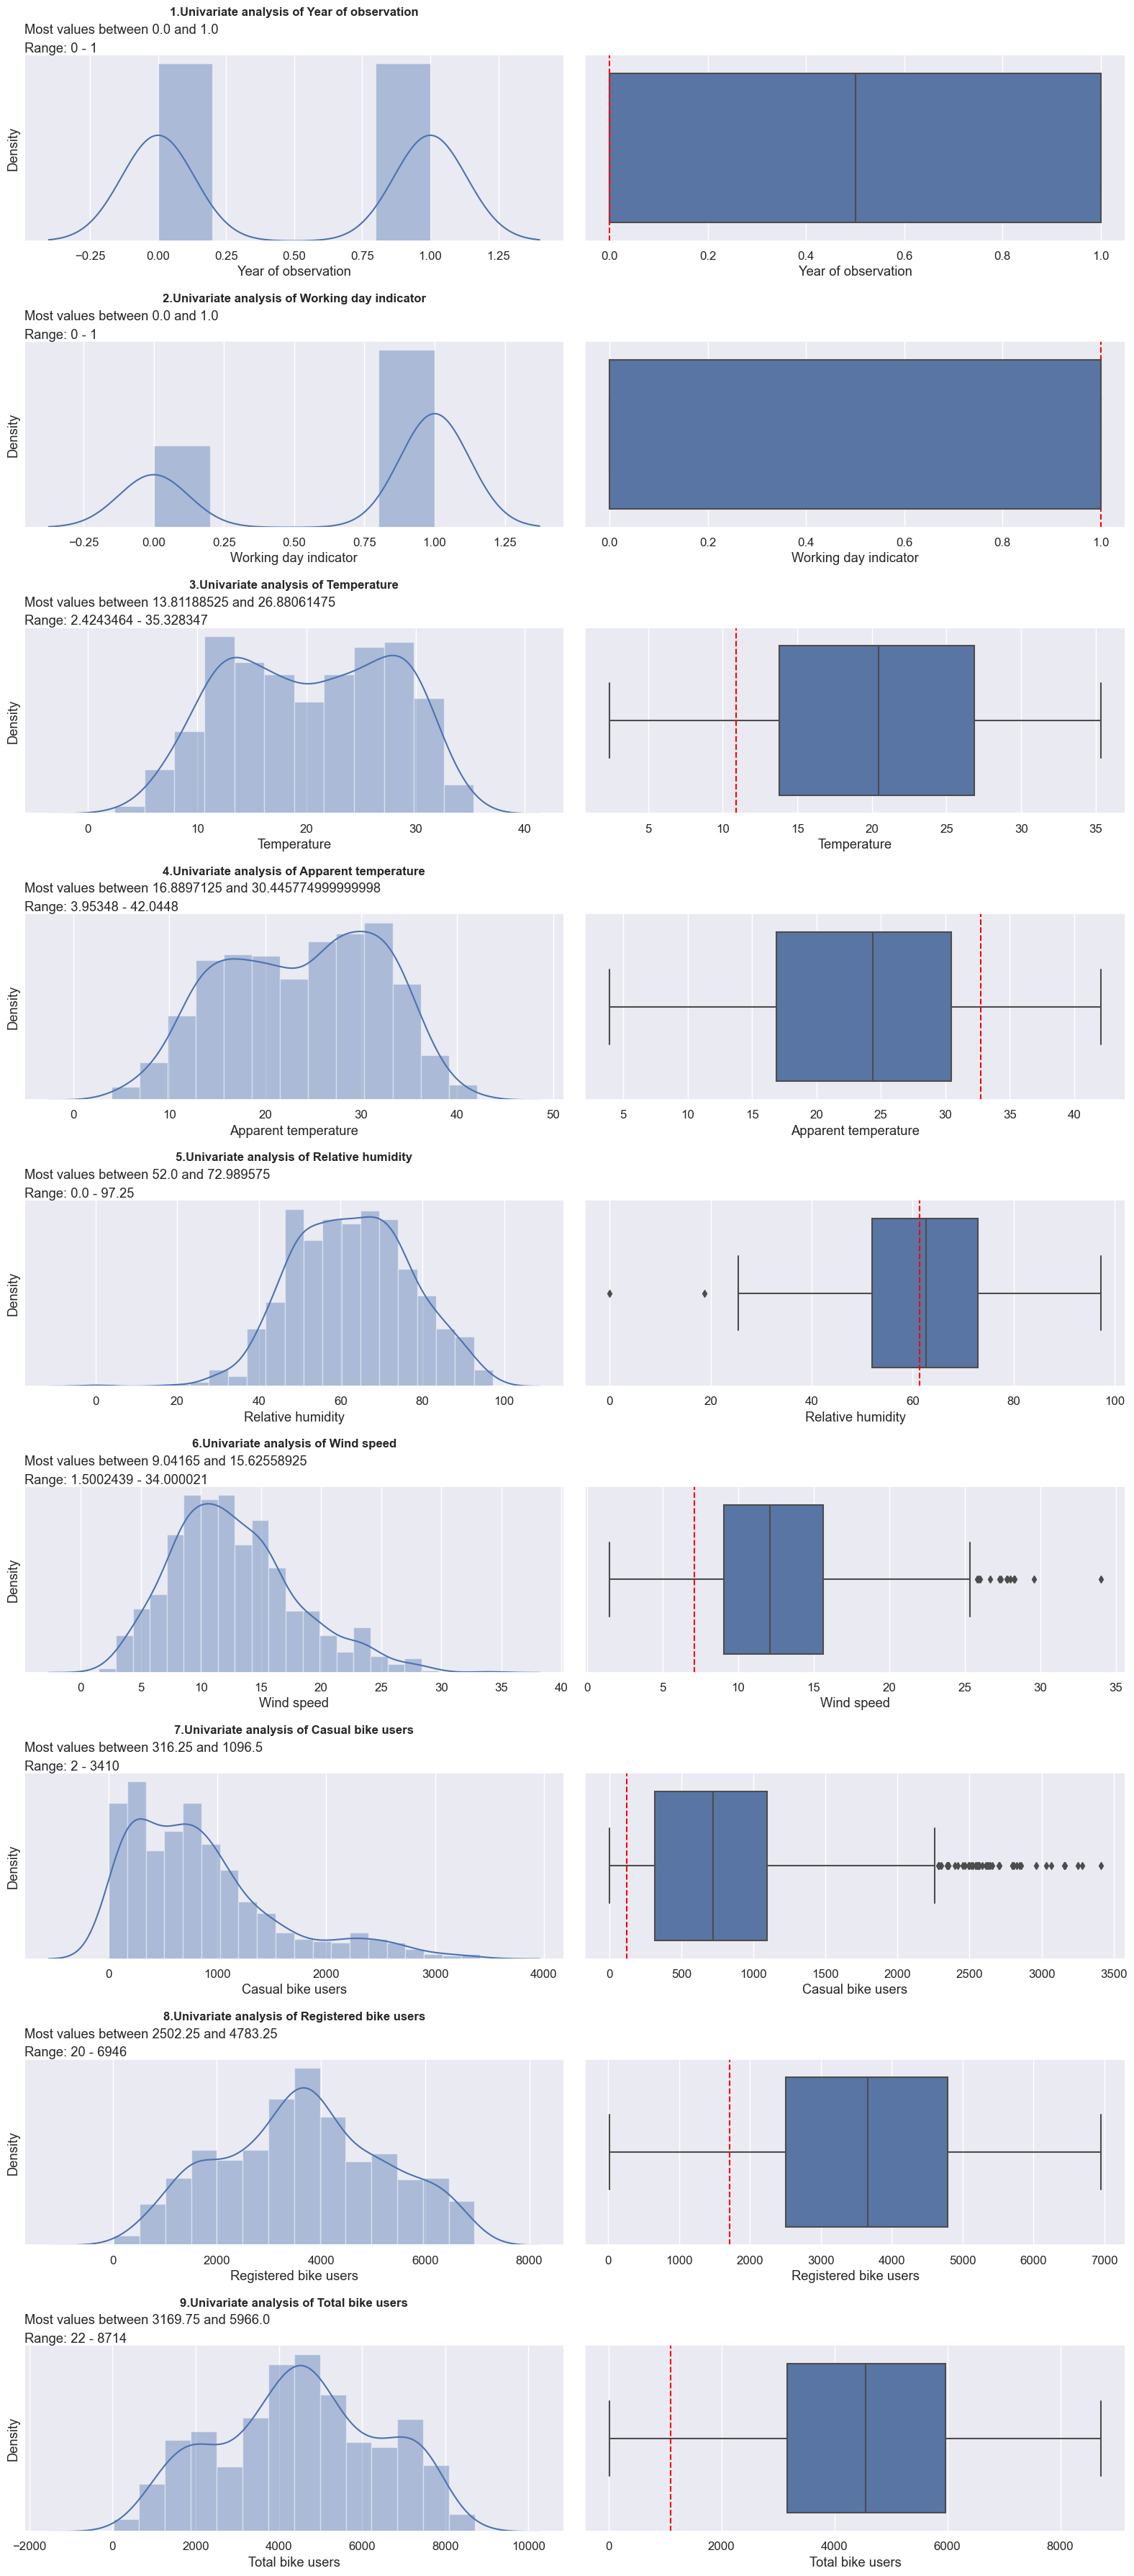

In [144]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
univariate_analysis(df,numerical_columns)

## Unordered Categorical Variable Analysis


In [145]:
object_columns = df.select_dtypes(include=[object]).columns

In [146]:
object_columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [147]:

def plot_column_distribution(df, columns_info):
    """
    Plot the distribution of multiple columns in a dataframe.

 Parameters:
    df (pandas.DataFrame): The input dataframe.
    columns_info (list): A list of objects containing column information.
        Each object should have the following properties:
            - column (str): The column name.
            - title (str): The title of the plot.
            - xlabel (str): The label for the x-axis.
            - ylabel (str): The label for the y-axis.
    """
    for column_info in columns_info:
        column = column_info['column']
        title = column_info['title']
        xlabel = column_info['xlabel']
        ylabel = column_info['ylabel']
        df[column].value_counts().plot.bar(title=title, xlabel=xlabel, ylabel=ylabel, rot=45)
        plot.show()

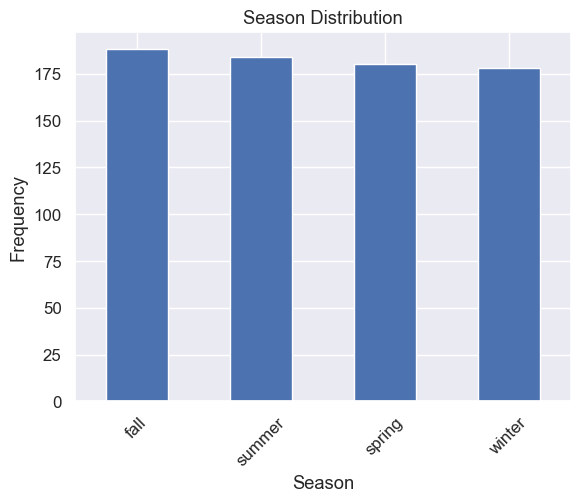

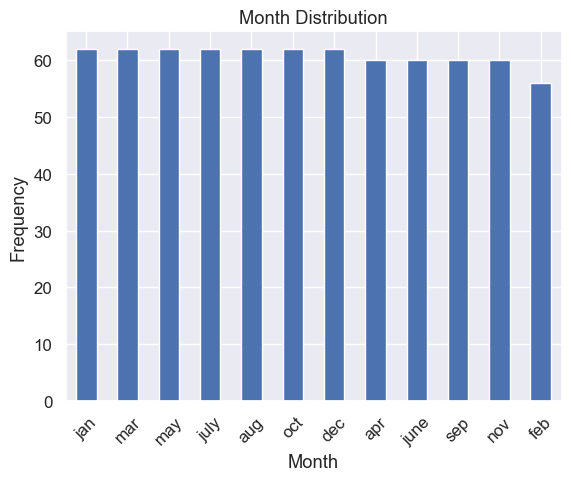

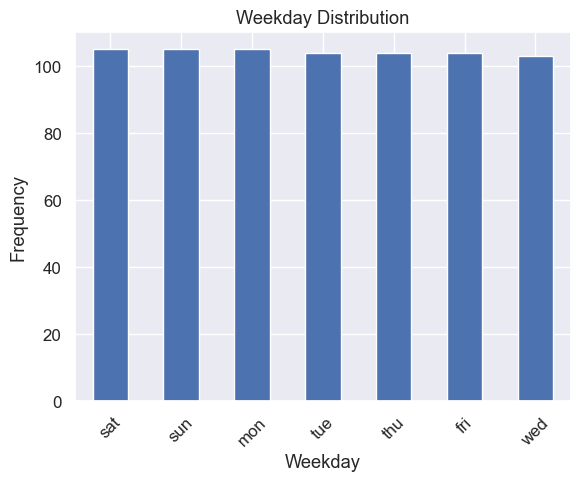

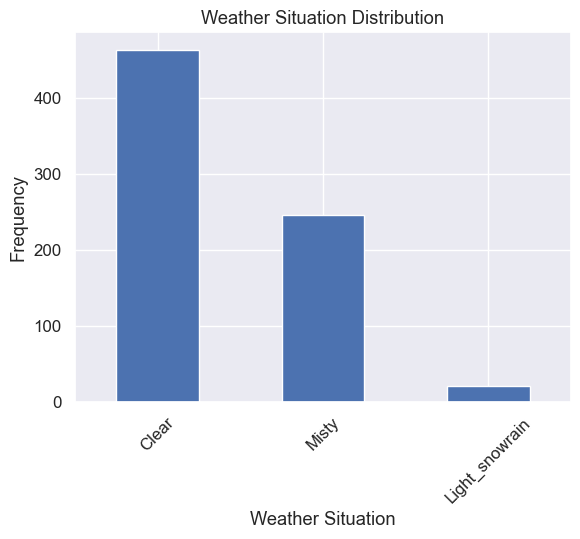

In [148]:
columns_info = [
    {'column': 'season', 'title': 'Season Distribution', 'xlabel': 'Season', 'ylabel': 'Frequency'},
    {'column': 'mnth', 'title': 'Month Distribution', 'xlabel': 'Month', 'ylabel': 'Frequency'},
    {'column': 'weekday', 'title': 'Weekday Distribution', 'xlabel': 'Weekday', 'ylabel': 'Frequency'},
    {'column': 'weathersit', 'title': 'Weather Situation Distribution', 'xlabel': 'Weather Situation', 'ylabel': 'Frequency'}
]

plot_column_distribution(df, columns_info)

### Multivariant Analysis

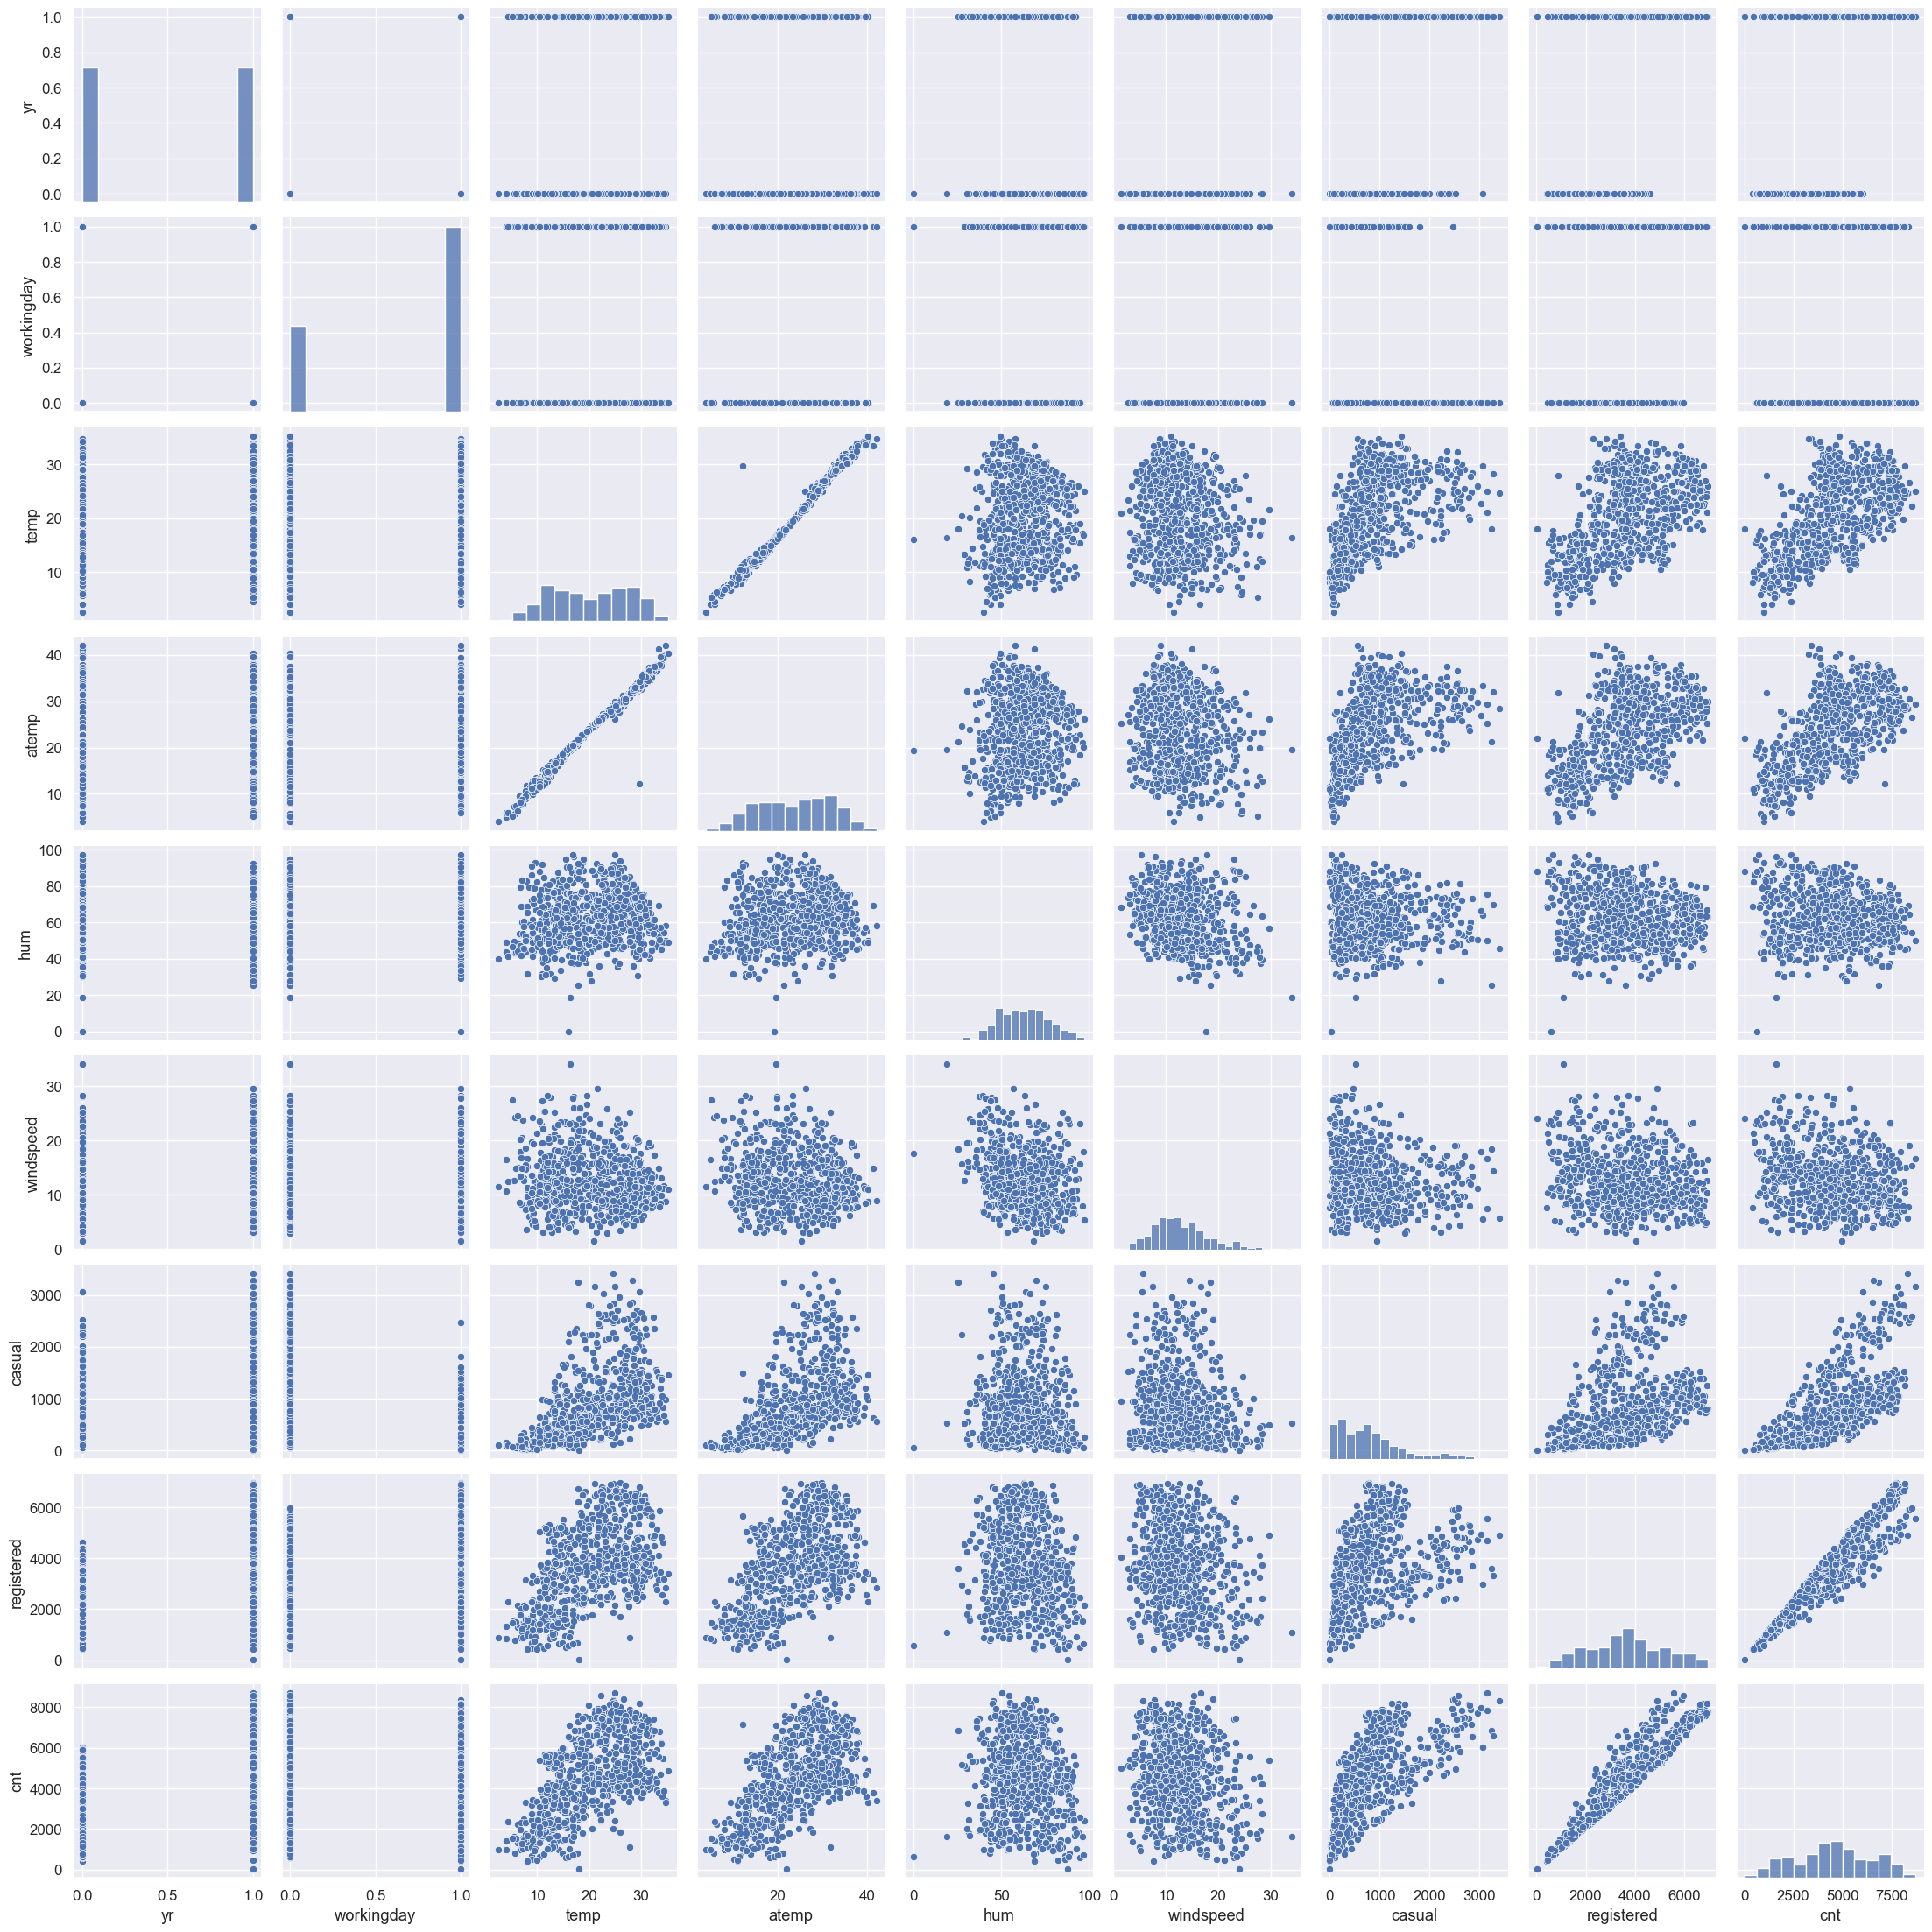

In [150]:
sea.pairplot(data=df,vars=numerical_columns)
plot.show()

In [151]:
def analyze_correlations(df, numeric_cols, thresh_config):
    # Calculate correlation matrix
    corr_matrix = df[numeric_cols].corr()

    # Initialize empty dictionaries to store variable pairs
    correlations = {category: [] for category in thresh_config}

    # Iterate over the upper triangle of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            # Get the correlation coefficient
            corr_coef = corr_matrix.iloc[i, j]

            # Categorize correlations based on thresholds
            for category, thresh in thresh_config.items():
                if category == "Strong Positive" and corr_coef > thresh:
                    correlations[category].append((corr_matrix.columns[i], corr_matrix.columns[j], corr_coef))
                elif category == "Positive" and corr_coef > thresh_config["Strong Positive"] and corr_coef <= thresh:
                    correlations[category].append((corr_matrix.columns[i], corr_matrix.columns[j], corr_coef))
                elif category == "Weak Positive" and corr_coef > 0 and corr_coef <= thresh:
                    correlations[category].append((corr_matrix.columns[i], corr_matrix.columns[j], corr_coef))
                elif category == "Weak Correlation" and corr_coef > thresh_config["Weak Positive"] and corr_coef <= thresh:
                    correlations[category].append((corr_matrix.columns[i], corr_matrix.columns[j], corr_coef))
                elif category == "Weak Negative" and corr_coef < 0 and corr_coef >= thresh:
                    correlations[category].append((corr_matrix.columns[i], corr_matrix.columns[j], corr_coef))
                elif category == "Negative" and corr_coef < thresh_config["Weak Negative"] and corr_coef >= thresh:
                    correlations[category].append((corr_matrix.columns[i], corr_matrix.columns[j], corr_coef))
                elif category == "Strong Negative" and corr_coef < thresh:
                    correlations[category].append((corr_matrix.columns[i], corr_matrix.columns[j], corr_coef))

    return correlations



thresh_config = {
    "Strong Positive": 0.7,
    "Positive": 0.5,
    "Weak Positive": 0.4,
    "Weak Correlation": 0.1,
    "Weak Negative": -0.3,
    "Negative": -0.5,
    "Strong Negative": -0.7
}

correlations = analyze_correlations(df, numerical_columns, thresh_config)

# Print results
table_data = []

for category, var_pairs in correlations.items():
    for var1, var2, corr_coef in var_pairs:
        table_data.append({
            "Category": category,
            "Feature A": var1,
            "Feature B": var2,
            "Correlation Coefficient": corr_coef
        })

df_corr = pd.DataFrame(table_data)

df_corr

,Category,Feature A,Feature B,Correlation Coefficient
0,Strong Positive,temp,atemp,0.991696
1,Strong Positive,registered,cnt,0.945411
2,Weak Positive,yr,temp,0.048789
3,Weak Positive,yr,atemp,0.047215
4,Weak Positive,yr,casual,0.250502
5,Weak Positive,workingday,temp,0.053470
6,Weak Positive,workingday,atemp,0.052940
7,Weak Positive,workingday,hum,0.023202
8,Weak Positive,workingday,registered,0.305437
9,Weak Positive,workingday,cnt,0.062542


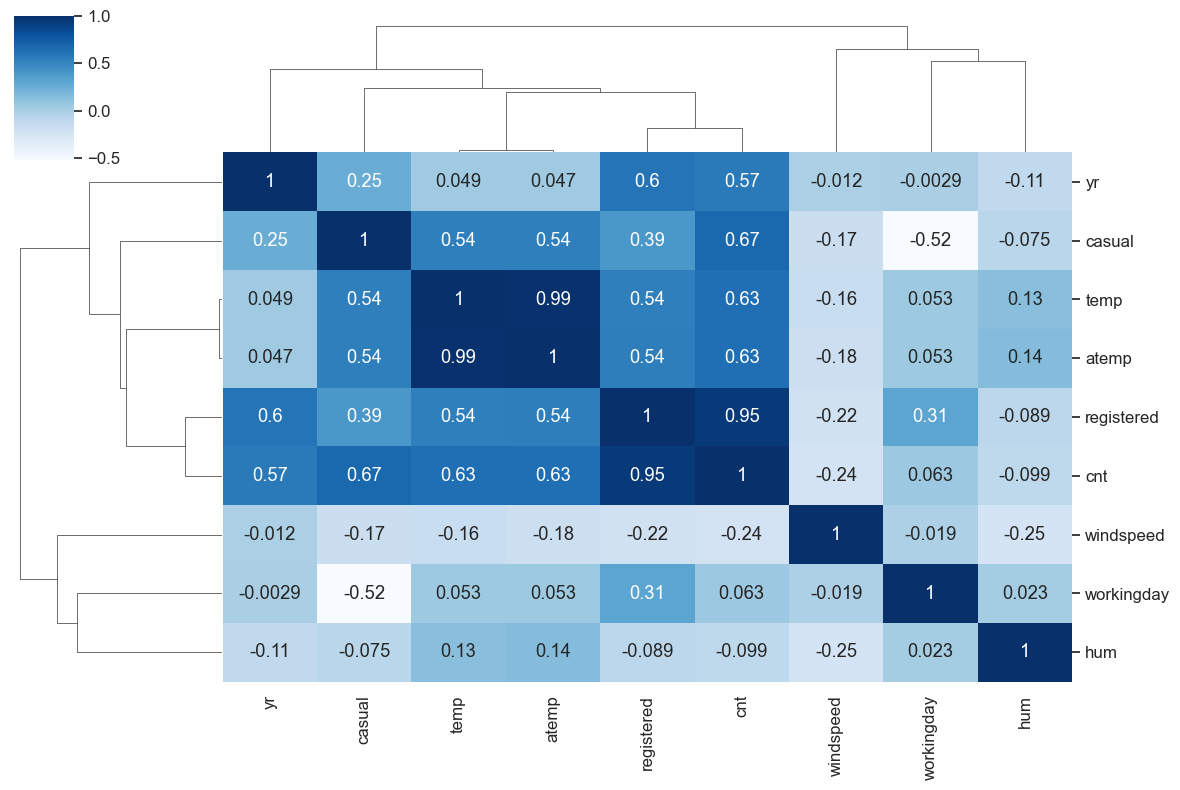

In [152]:
corr = loandf[numerical_columns].corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  casual      730 non-null    int64  
 11  registered  730 non-null    int64  
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


In [158]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.mnth,drop_first=True,dtype=int)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True,dtype=int)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True,dtype=int)
seasons_df=pd.get_dummies(df.season,drop_first=True,dtype=int)

In [109]:
months_df


,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,False,False


In [160]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [161]:
df_new.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [162]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)


In [163]:
# check the head of new dataframe

df_new.head()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [164]:
# check the shape of new dataframe

df_new.shape

(730, 31)

In [165]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   workingday      730 non-null    int64  
 2   temp            730 non-null    float64
 3   atemp           730 non-null    float64
 4   hum             730 non-null    float64
 5   windspeed       730 non-null    float64
 6   casual          730 non-null    int64  
 7   registered      730 non-null    int64  
 8   cnt             730 non-null    int64  
 9   aug             730 non-null    int64  
 10  dec             730 non-null    int64  
 11  feb             730 non-null    int64  
 12  jan             730 non-null    int64  
 13  july            730 non-null    int64  
 14  june            730 non-null    int64  
 15  mar             730 non-null    int64  
 16  may             730 non-null    int64  
 17  nov             730 non-null    int

# Split data into training and testing sets:


In [175]:
X = df_new.drop('cnt', axis=1)
y = df_new['cnt']

In [176]:
X.head()


,yr,workingday,temp,atemp,hum,windspeed,casual,registered,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [177]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
X_train.head()

,yr,workingday,temp,atemp,hum,windspeed,casual,registered,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
247,0,0,27.606653,31.28230,79.0417,14.250632,1236,2115,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
335,0,1,12.880847,16.57165,62.5833,6.750518,268,3672,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
702,1,1,19.509153,23.45270,73.3750,11.666643,551,6055,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
440,1,0,21.080847,25.25230,75.5833,7.417168,3155,4681,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
136,0,1,23.028347,26.92645,83.7917,18.582718,678,3445,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [174]:
len(df)

730

In [183]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    print('Started evaluating Models')
    try:
        report = {}
        for i in range(len(models)):
            model = list(models.values())[i]
            # Train model
            model.fit(X_train,y_train)
            # Predict Testing data
            y_test_pred =model.predict(X_test)

            # Get R2 scores for train and test data
            #train_model_score = r2_score(ytrain,y_train_pred)
            test_model_score = r2_score(y_test,y_test_pred)

            report[list(models.keys())[i]] =  test_model_score

        return report

    except Exception as e:
        logging.info('Exception occured during model training')
        raise CustomException(e,sys)

In [189]:

    def initate_model_training(train_array,test_array):
        try:
            print('Splitting Dependent and Independent variables from train and test data')
            X_train, y_train, X_test, y_test = (
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

            models={
            'LinearRegression':LinearRegression()
            
            }
            
            model_report:dict=evaluate_model(X_train,y_train,X_test,y_test,models)
            print(model_report)
            print('\n====================================================================================\n')
            print(f'Model Report : {model_report}')

            # To get best model score from dictionary 
            best_model_score = max(sorted(model_report.values()))

            best_model_name = list(model_report.keys())[
                list(model_report.values()).index(best_model_score)
            ]
            
            best_model = models[best_model_name]

            print(f'Best Model Found , Model Name : {best_model_name} , R2 Score : {best_model_score}')
            print('\n====================================================================================\n')
            print(f'Best Model Found , Model Name : {best_model_name} , R2 Score : {best_model_score}')

            
        except Exception as e:
            print('Exception occured at Model Training')
            print('Error Message: ', str(e))

In [193]:
y_train.head()

247    3351
335    3940
702    6606
440    7836
136    4123
Name: cnt, dtype: int64

In [191]:
initate_model_training(X_train,y_train)

Splitting Dependent and Independent variables from train and test data
Exception occured at Model Training
Error Message:  (slice(None, None, None), slice(None, -1, None))


## Build OLS model

In [180]:
model_ols = sm.OLS(y_train, X_train).fit()

# Evaluate OLS model
print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.027e+31
Date:                Sat, 25 May 2024   Prob (F-statistic):                        0.00
Time:                        07:52:18   Log-Likelihood:                          14401.
No. Observations:                 584   AIC:                                 -2.874e+04
Df Residuals:                     554   BIC:                                 -2.861e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### Regression Metrics

* **MSE (Mean Squared Error)**: measures the average squared difference between predicted and actual values.
* **MAE (Mean Absolute Error)**: measures the average absolute difference between predicted and actual values.
* **RMSE (Root Mean Squared Error)**: the square root of MSE.
* **R (R-Squared)**: measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

### Model Evaluation Technique

* **Cross-Validation**: evaluates the model's performance on unseen data by splitting the dataset into training and testing sets.